# Exploratory Data Analysis - English Premier League 2020/2021

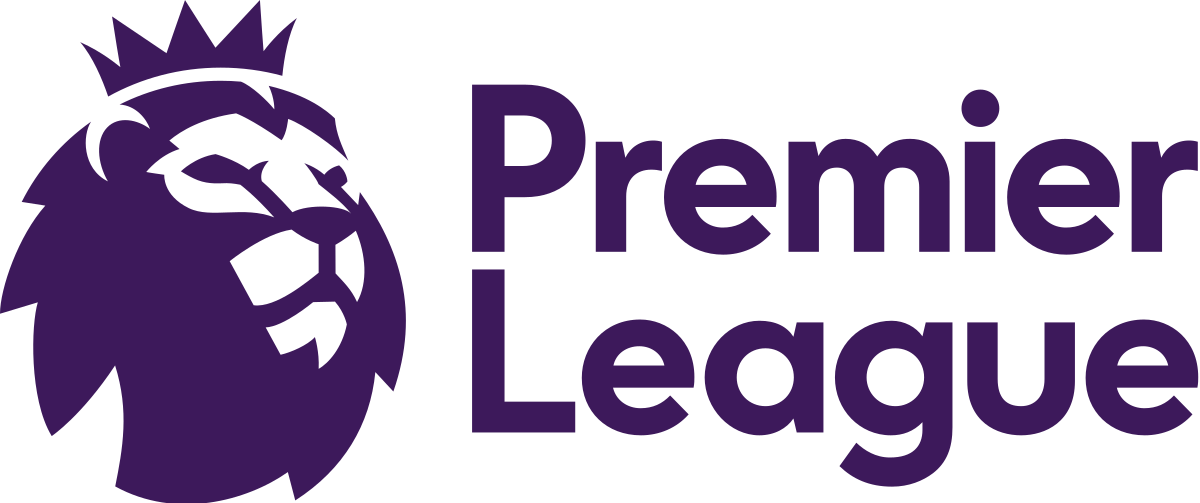

The dataset includes lots of different statistics about games.

* xG, xA: Expected goals and expected assists of each individual player.
* Scored and Assists: Goal scored and Assists.
* Passes: Passes attempted and percentage of passes completed of eachindividual player.
* Penalty: Penalty scored and Penalty attempts.

There are also basic stats such as yellow cards, red cards, age, club representing, nationality, position, starts and minutes.

## Import Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Dataset
Here we are displaying the first 5 rows of the datasets which includes the statistics of each player from the English Premier League.

In [ ]:
epl = pd.read_csv('../input/english-premier-league202021/EPL_20_21.csv')
epl.head()

## Data Exploration

In [ ]:
# Number of rows and columns
rows, cols = epl.shape
print('Number of players: {}'.format(rows))
print('Number of stats per player: {}'.format(cols))

In [ ]:
list(epl.columns)

In [ ]:
epl.info()

In [ ]:
epl_club_position=epl.groupby('Club').Position.value_counts()
epl_club_position

In [ ]:
epl.describe()

## Exploratory Data Analysis and Data Visualization

#### Number of Players In Each Position

In [ ]:
# Number of players in the EPL by each position
epl_position = epl['Position'].value_counts()
print(epl_position)

In [ ]:
fig = px.pie(epl_position, values=epl_position.values, names=epl_position.index)
fig.show()

#### Players By Age In Each Position

In [ ]:
pd.crosstab(epl['Age'], epl['Position']).plot(kind='bar',figsize=(15,15))

#### Age Distribution of the Premier League

In [ ]:
plt.figure(figsize=(14,5))
plt.title('Age Distribution of the Premier League')
sns.distplot(a=epl['Age'], kde=True, bins=20)
plt.axvline(x=np.mean(epl['Age']),c='orange',label='Mean Age of All Players')
plt.legend()

#### Players by Age of the Premier League

In [ ]:
plt.figure(figsize= (14,8))

ax = sns.countplot(x='Age', data=epl)
ax.set_title(label='Count of Players by age', fontsize=20)

ax.set_xlabel(xlabel='Age')
ax.set_ylabel(ylabel='Count')

plt.show()

In [ ]:
print("Oldest Player/s: ")
epl.loc[epl['Age'] == epl['Age'].max()]

In [ ]:
print("Youngest Player/s: ")
epl.loc[epl['Age'] == epl['Age'].min()]

### Premier League Top Goalscorers

In [ ]:
epl_top_goals = epl.sort_values(by=['Goals'], ascending=False)[:10]
fig = px.bar(epl_top_goals, x='Name', y='Goals',color='Goals',hover_data=['Club','Age'],text='Goals')
fig.show()

**Harry Kane from Tottenham Hotspur was the Premier League Top Scorer with 23 goals this season.**

### Premier League Top Assists

In [ ]:
epl_top_assists = epl.sort_values(by=['Assists'], ascending=False)[:10]

fig = px.bar(epl_top_assists, x='Name', y='Assists',color='Assists',hover_data=['Club','Age'],text='Assists')
fig.show()

**Harry Kane also had the most assists in the Premier League with 14 assists this season.**

#### Goals per 90 minutes 
* Goals Per90 A player or team goal tally divided into 90 minute chunks. We do this to normalize for actual time played, as it produces far more accurate rates of goal scoring than using appearances, starts, etc.

In [ ]:
epl['Goals_p90'] = epl['Goals']/epl['Mins']*90
epl.head()

In [ ]:
epl_goals_p90 = epl[epl['Mins']>1500].sort_values(by=['Goals_p90'], ascending=False)[:10]

fig = px.bar(epl_goals_p90, x='Name', y='Goals_p90',color='Goals_p90',hover_data=['Club','Age'])
fig.show()

**Harry Kane had the highest goals per 90 with 0.67 from sorting all players that has played beyond 1500 minutes in the season.**

#### Assists Per 90 Minutes

In [ ]:
epl['Assists_p90'] = epl['Assists']/epl['Mins']*90
epl.head()

In [ ]:
epl_Assists_p90 = epl[epl['Mins']>1500].sort_values(by=['Assists_p90'], ascending=False)[:10]

fig = px.bar(epl_Assists_p90, x='Name', y='Assists_p90',color='Assists_p90',hover_data=['Club','Age'])
fig.show()

**Kevin De Bruyne from Manchester City had the highest Assists per 90 with 0.54 from sorting all players that has played beyond 1500 minutes in the season.**

#### Goals and Minutes

In [ ]:
plt.figure()
x=epl['Goals']
y=epl['Mins']

sns.regplot(x,y)
plt.title('Goals v Minutes')
plt.xlabel('Goals')
plt.ylabel('Minutes')
plt.show()

#### Assists and Minutes

In [ ]:
plt.figure()
x=epl['Assists']
y=epl['Mins']

sns.regplot(x,y)
plt.title('Assists v Minutes')
plt.xlabel('Assists')
plt.ylabel('Minutes')
plt.show()

#### Defenders of the Premier League

In [ ]:
# Taking subsets of defenders data for analysis
epl_defender = epl[epl['Position'] == 'DF']

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(epl_defender.corr(), annot=True)
plt.show()

In [ ]:
epl_defender.describe()

#### Top 10 Defenders With Most Goals Scored

In [ ]:
epl_top_goals_defender = epl_defender.sort_values(by=['Goals'], ascending=False)[:10]

fig = px.bar(epl_top_goals_defender, x='Name', y='Goals',color='Goals',hover_data=['Club','Age'],text='Goals')
fig.show()

**Lewis Dunk from Brighton and Kurt Zouma from Chelsea FC were the Defender top scorer in the Premier League with 5 goals each.**

#### Top 10 Defenders With Most Assists

In [ ]:
epl_top_assists_defender = epl_defender.sort_values(by=['Assists'], ascending=False)[:10]

fig = px.bar(epl_top_assists_defender, x='Name', y='Assists',color='Assists',hover_data=['Club','Age'],text='Assists')
fig.show()

**Aaron Cresswell from West Ham was the Defender top assister in the Premier League with 8 assists.**

#### Top 10 Defenders With Most Passes Attempted

In [ ]:
epl_attempt_pass_defender = epl_defender.sort_values(by=['Passes_Attempted'], ascending=False)[:10]
fig = px.bar(epl_attempt_pass_defender, x='Name', y='Passes_Attempted',color='Passes_Attempted',hover_data=['Club','Age'],text='Passes_Attempted')
fig.show()

**Andrew Robertson from Liverpool had the most passes attempted in the league with 3214 passes.**

#### Premier League Clubs Defenders With Most Passes Attempted

In [ ]:
epl_defender['Passes_Attempted'].groupby(epl_defender['Club']).sum().sort_values(ascending=False)

#### Premier League Clubs Defenders Average Percentage of Passes Completed beyond 15 Games Played

In [ ]:
epl_perc_defender = epl_defender[epl_defender['Matches'] >= 15].sort_values('Perc_Passes_Completed',ascending=False)
epl_club_pass = epl_perc_defender['Perc_Passes_Completed'].groupby(epl_perc_defender['Club']).mean().sort_values(ascending=False)
print(epl_club_pass)

#### Players Nationality of the Premier League

In [ ]:
epl_Nationality = epl['Nationality'].value_counts().head(20)
fig = go.Figure(data=[go.Pie(labels=epl_Nationality.index, values=epl_Nationality.values, hole=.5)])
fig.show()

#### Number of Players in Each Club

In [ ]:
grouped_by_club = epl.groupby('Club').size()
print(grouped_by_club)

### Premier League Goals of each Club

In [ ]:
epl_club_goals = epl['Goals'].groupby(epl['Club']).sum().sort_values(ascending=False)
print(epl_club_goals)